In [10]:
import pandas as pd
import numpy as np

In [11]:
# Read csv file
df = pd.read_csv("./telco_customer_churn.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Phoneservice
0,1,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,0,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,0,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,0,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


In [12]:
print('DataFrame info')
print(df.info())

DataFrame info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-

We see that the Total Charges is an object instead of float so surely it has whitespaces around it. Let's strip those whitespaces and convert it to float.


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(value=df['TotalCharges'].median())

Here i dropped customerID because we don't need it at all


In [14]:
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        print(f"\n{col.title()} Unique Values:")
        print(df[col].unique())
        print(f"\n{col.title()} Value Counts:")
        print(df[col].value_counts())


Internetservice Unique Values:
['DSL' 'Fiber optic' 'No']

Internetservice Value Counts:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Contract Unique Values:
['Month-to-month' 'One year' 'Two year']

Contract Value Counts:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Paymentmethod Unique Values:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Paymentmethod Value Counts:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


We can see that **No internet service** is in multiple columns and related to the type of internet service a customer has. We can consolidate these into a single binary column indicating whether a customer has no internet service or not.
So when the internet service is dsl or fibre it should be true for all the corresponding columns otherwise false when the customer not have an internet service.


In [15]:
for col in df.columns:
    if list(sorted(df[col].unique().tolist())) == list(sorted(['No internet service', 'No', 'Yes'])):
        df[col] = df[col].replace({'No internet service': 'No'})


Same for **No phone service**.
We can consolidate these into a single binary column indicating whether a customer has no phone service or not.


In [16]:
df['Phoneservice'] = df['MultipleLines'].replace({'Yes': 1,'No':1, 'No phone service': 0})
for col in df.columns:
    if list(sorted(df[col].unique().tolist())) == list(sorted(['No phone service', 'No', 'Yes'])):
        df[col] = df[col].replace({'No phone service': 'No'})

Now we replace all yes with 1 and no with 0 for all the binary columns.


In [17]:
for col in df.columns:
    if sorted(df[col].unique().tolist()) == ['No', 'Yes']:
        df[col] = df[col].map({'No': 0, 'Yes': 1})
    if sorted(df[col].unique().tolist()) == ['Female', 'Male']:
        df[col] = df[col].map({'Male': 0, 'Female': 1})

In [18]:
dummies = pd.get_dummies(df,dtype=int, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [27]:
# Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, recall_score,f1_score,precision_score,mean_squared_error, r2_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [20]:
# Define features and target variable
X = dummies.drop(columns=['Churn'])  # Features
y = dummies['Churn']                 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The svm part here


In [26]:
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1]

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



/home/shk/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shk/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shk/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


So the best param is {'svm**C': 0.1, 'svm**gamma': 'scale', 'svm\_\_kernel': 'linear'}


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



/home/shk/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shk/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/shk/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/shk/.config/matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /tmp/matplotlib-8k3kldn7 because there was an issue with the default path (/home/shk/.config/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


[[934 102]
 [151 222]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

0.8204400283889283


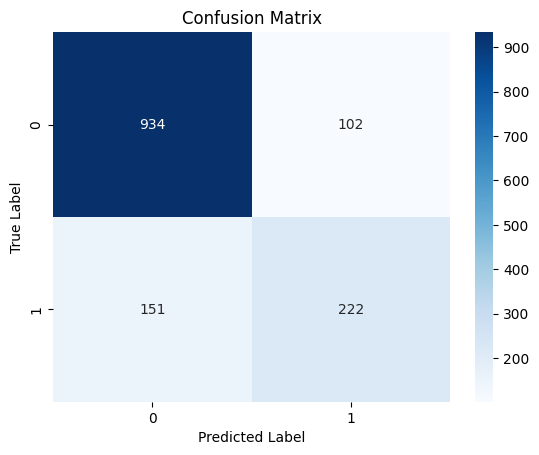

In [30]:
steps = [('scaler', StandardScaler()),
    ('logreg', LogisticRegression())]

pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(pipeline.score(X_test,y_test))
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [31]:
param_grid = {'logreg__max_iter': [500, 600, 700, 800, 900, 1000]}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use pipeline consistently
pipeline_cv = GridSearchCV(pipeline, param_grid, cv=kf)
pipeline_cv.fit(X_train, y_train)

# Get predictions
y_pred = pipeline_cv.predict(X_test)
y_pred_proba = pipeline_cv.predict_proba(X_test)[:, 1]
print("=== DETAILED MODEL EVALUATION ===")
print(f"Accuracy: {pipeline_cv.score(X_test, y_test):.4f}")
print(f"Total Test Samples: {len(y_test)}")
print(f"Actual Churns: {sum(y_test)}")
print(f"Predicted Churns: {sum(y_pred)}")

print(f"\nPrecision (Churn): {precision_score(y_test, y_pred):.4f}")
print(f"Recall (Churn): {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score (Churn): {f1_score(y_test, y_pred):.4f}")


=== DETAILED MODEL EVALUATION ===
Accuracy: 0.8204
Total Test Samples: 1409
Actual Churns: 373
Predicted Churns: 324

Precision (Churn): 0.6852
Recall (Churn): 0.5952
F1-Score (Churn): 0.6370


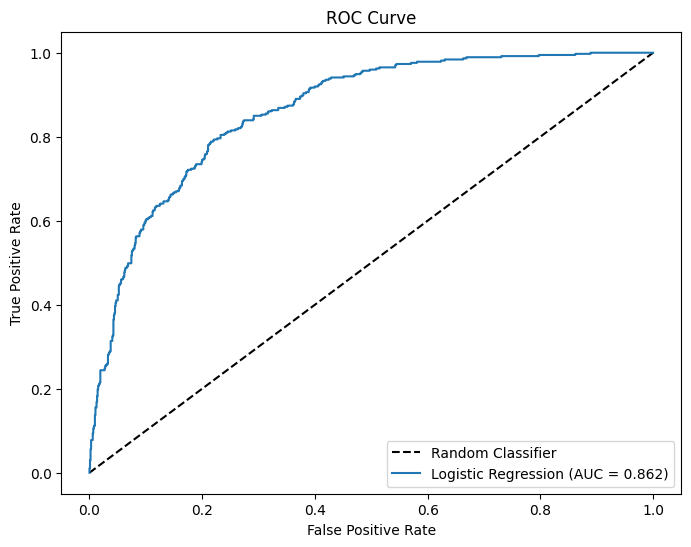

In [32]:
# Complete your ROC curve visualization
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0,1],[0,1],'k--', label='Random Classifier')
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


=== Random Forest Classifier Evaluation ===
Accuracy: 0.7942
Precision (Churn): 0.6602
Recall (Churn): 0.4584
F1-Score (Churn): 0.5411


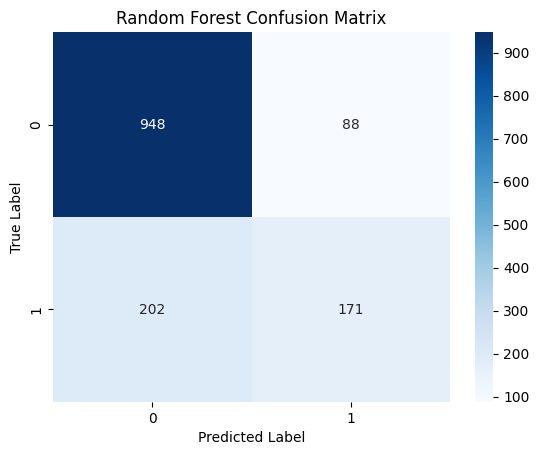

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate the model
print("=== Random Forest Classifier Evaluation ===")
print(f"Accuracy: {rf.score(X_test, y_test):.4f}")
print(f"Precision (Churn): {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall (Churn): {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score (Churn): {f1_score(y_test, y_pred_rf):.4f}")

# Confusion Matrix
conf_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

=== Gradient Boosting Classifier Evaluation ===
Accuracy: 0.8091
Precision (Churn): 0.6722
Recall (Churn): 0.5442
F1-Score (Churn): 0.6015


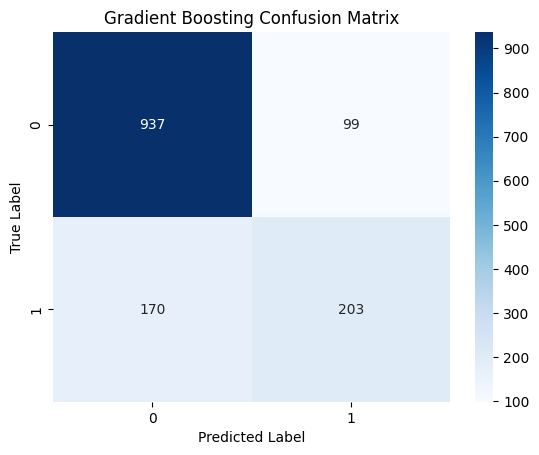

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]

# Evaluate the model
print("=== Gradient Boosting Classifier Evaluation ===")
print(f"Accuracy: {gb.score(X_test, y_test):.4f}")
print(f"Precision (Churn): {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall (Churn): {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1-Score (Churn): {f1_score(y_test, y_pred_gb):.4f}")

# Confusion Matrix
conf_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()